In [9]:
!pip install JSAnimation
# Import the libraries
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML
import numpy as np
import copy as cp


## **Solve Exercise 5 of Chapter 2**

In [10]:
# Sensor
def sense(x):
    return x

In [ ]:
# Simulator
def simulate(Δt, x, u):
    # The control input is equal to the velocity of the robot
    dx = np.array(u)

    # Euler integration
    x += Δt * dx
    return x

In [ ]:
# Control Policy
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    xd = 3
    yd = 3
    kp = (3-2)/(3-1)
    ux = kp * (xd - y[0]) # y[0] = x
    uy = kp * (yd - y[1]) # y[1] = y

    return np.array([ux, uy])

In [ ]:
# Run simulator
tf = 19.
Δt = 0.01    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = np.array([1., 2.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(cp.copy(x))

x_log = np.array(x_log)

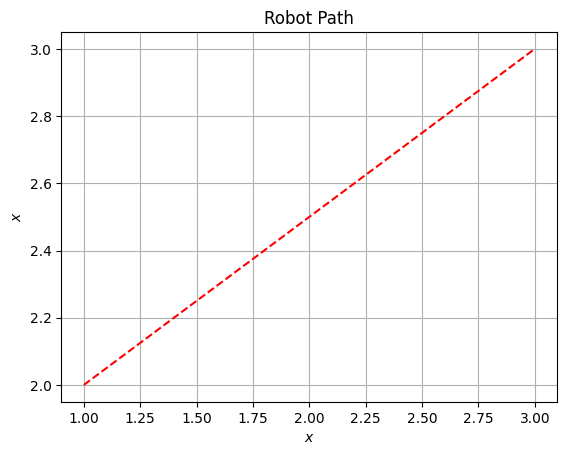

In [11]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x_log[:,0], x_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$x$")
ax.grid()

## **Solve Exercise 6 of Chapter 2.**

In [12]:
def control2(t, y):
    # Set the perspective target points
    targets = [np.array([-2.8, 2.8]), np.array([2.8, -2.8]), np.array([2.8, 2.8]), np.array([0., 0.])]
    # Set the change time
    switch_times = [10, 20, 35, 50]  # Adjusted for clarity in timing

    # Determine the current target based on time
    current_target = targets[0]  # Default to the first target
    accumulated_time = 0
    for i, switch_time in enumerate(switch_times):
        accumulated_time += switch_time  # Accumulate switch times
        if t <= accumulated_time:
            current_target = targets[i]
            break

    # Proportional control parameters
    kp = 1.0  # Proportional gain, adjust as needed

    # Control signal calculation
    ux = kp * (current_target[0] - y[0])
    uy = kp * (current_target[1] - y[1])

    return np.array([ux, uy])


In [13]:
# Run simulator
tf = 70.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = np.array([-3., -3.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control2(t, y)
    x = simulate(Δt, x, u)
    x_log.append(cp.copy(x))

x_log = np.array(x_log)

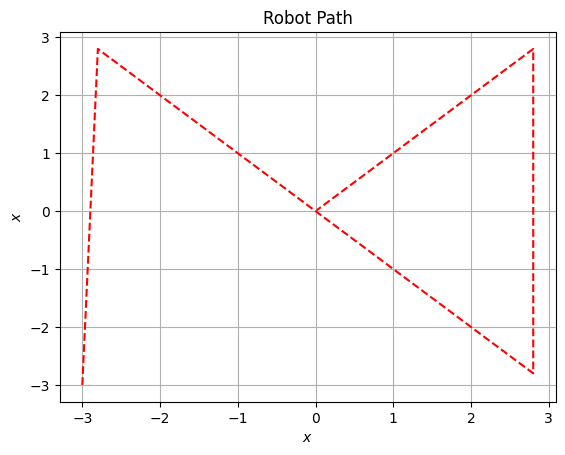

In [14]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x_log[:,0], x_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$x$")
ax.grid()

## **Part 2: Learning to fly -- 1**

In [19]:
def simulate(Δt, x, u, m=1, g=9.8):
    # Control input affects the acceleration
    dx = np.array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])

    # Include the gravity in the acceleration in z
    dx[5] += - g

    # Euler integration
    x += Δt * dx

    # Simulate the floor (Plastic collision)
    if x[2] < 0:
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0

    return x

In [20]:
def control(t, y):
    ux = 0
    uy = 0
    uz = 0  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]

In [21]:
tf = 3.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
# X,Y,Z,X1,Y1,Z1
x = np.array([0., 0., 10., 0.,0.,0.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate(Δt, x, u)
    x_log.append(cp.copy(x))

x_log = np.array(x_log)

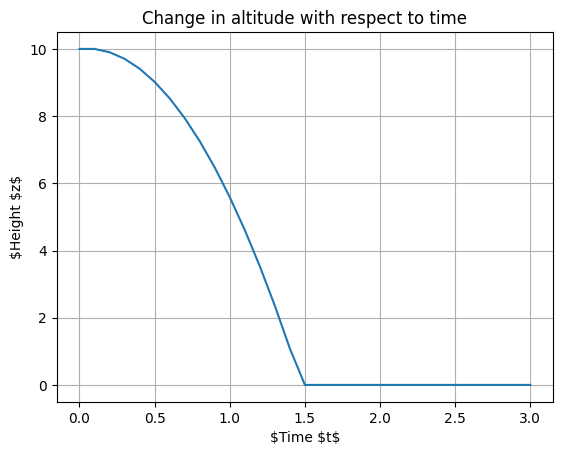

In [22]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()


# axes().set_ylabel("Time z")

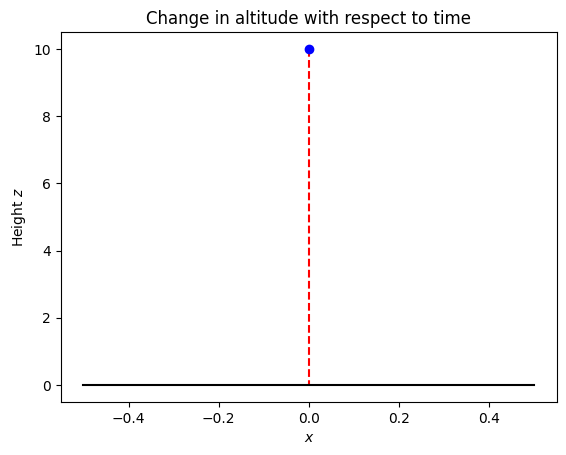

In [23]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML



fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')

    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')

    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')

    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

**Include a buoyancy force of fb=9.0 in the simulator. How does it compare with the free fall? Which one falls faster?  (Exercise 1 of Chapter 3).**

In [24]:
def simulate_fb(Δt, x, u, m=1, g=9.8):
    # Control input affects the acceleration
    dx = np.array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])
    fb = 9.0 # fb = mg
    # Include the gravity in the acceleration in z
    dx[5] += - g + (fb/m)

    # Euler integration
    x += Δt * dx

    # Simulate the floor (Plastic collision)
    if x[2] < 0:
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0

    return x

In [25]:
def control(t, y):
    ux = 0
    uy = 0
    uz = 0  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]

In [30]:
tf = 10.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
# X,Y,Z,X1,Y1,Z1
x = np.array([0., 0., 10., 0.,0.,0.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)
    x = simulate_fb(Δt, x, u)
    x_log.append(cp.copy(x))

x_log = np.array(x_log)

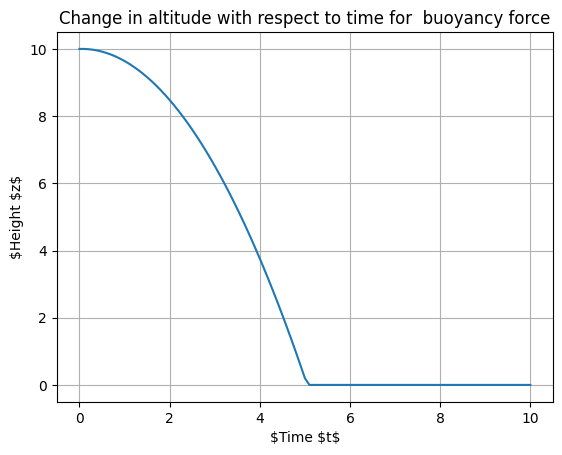

In [32]:
fig, ax = plt.subplots()
ax.plot(time, x_log[:-1,2])
ax.set(title="Change in altitude with respect to time for  buoyancy force", xlabel="$Time $t$", ylabel="$Height $z$")
ax.grid()


# axes().set_ylabel("Time z")

**Write a height controller that compensates for gravity using a PD controller (Exercise 2 of Chapter 3).**


In [50]:
def simulate2(Δt, x, u, m=1, g=9.8):
    # Control input affects the acceleration
    dx = np.array([x[3], x[4], x[5], u[0]/m, u[1]/m, u[2]/m])

    # Include the gravity in the acceleration in z
    dx[5] += - g

    # Euler integration
    x += Δt * dx

    # Simulate the floor (Plastic collision)
    if x[2] < 0:
        x[2] = 0  # z = 0
        x[5] = 0  # vz = 0

    return x

In [63]:
def control_pd(t, y):
# u = kp(zd − z) + kd( ˙zd − z˙d) + mg
    # p = 0,0,10
    # pd = 0,0,zd
    # zd = 15 if we want to robot to move
    m = 1
    g = 9.8
    zd = 15
    z = y[2]
    z_dash = y[5]
    kp = 30
    kd = 15
    ux = 0
    uy = 0
    uz = kp * (zd - z) - kd * z_dash + m * g  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]

In [64]:
tf = 5.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
# X,Y,Z,X1,Y1,Z1
x = np.array([0., 0., 10., 0.,0.,0.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control_pd(t, y)
    x = simulate2(Δt, x, u)
    x_log.append(cp.copy(x))

x_log = np.array(x_log)

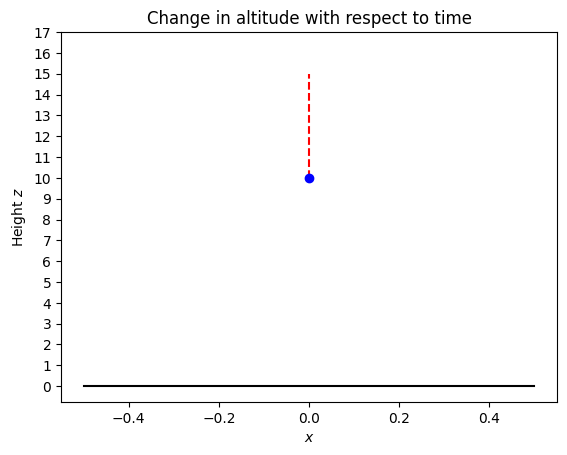

In [65]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML



fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')

    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')

    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')

    # Set the Interval of Height z
    ax.set_yticks(np.arange(0, 18,1))

    # Add the max height of the records
    if t > 0:
      max_z = np.max(x_log[:t, 2])
      max_index = np.argmax(x_log[:t,2])

      ax.text(x_log[max_index, 0], max_z, f'{max_z:.2f}', color='green')

    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

 **Solve the previous exercise but now, your controller considers a mass mˆ = 1. However,
the actual mass is m = 0.8. How can the robot compensate for the unknown value of the
mass? Can the robot maintain the desired altitude?**

In [55]:
def control_pd2(t, y):
# u = kp(zd − z) + kd( ˙zd − z˙d) + mg
    # p = 0,0,10
    # pd = 0,0,zd
    # zd = 15 if we want to robot to move
    m = 0.8
    g = 9.8
    zd = 15
    z = y[2]
    z_dash = y[5]
    kp = 30
    kd = 15
    ux = 0
    uy = 0
    uz = kp * (zd - z) - kd * z_dash + m * g  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]

In [56]:
tf = 5.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
# X,Y,Z,X1,Y1,Z1
x = np.array([0., 0., 10., 0.,0.,0.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control_pd2(t, y)
    x = simulate2(Δt, x, u)
    x_log.append(cp.copy(x))

x_log = np.array(x_log)

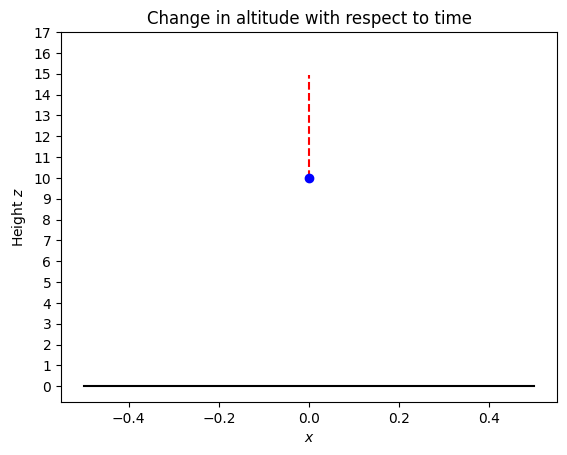

In [61]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML



fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')

    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')

    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')

    ax.set_yticks(np.arange(0, 18, 1))

    # Add the max height of the records
    if t > 0:
      max_z = np.max(x_log[:t, 2])
      max_index = np.argmax(x_log[:t,2])

      ax.text(x_log[max_index, 0], max_z, f'{max_z:.2f}', color='green')
    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())

In [97]:
def control_pd3(t, y):
# u = kp(zd − z) + kd( ˙zd − z˙d) + mg
    # p = 0,0,10
    # pd = 0,0,zd
    # zd = 15 if we want to robot to move
    m = 0.8
    g = 9.8
    zd = 15
    z = y[2]
    z_dash = y[5]
    kp = 60.5
    kd = 15
    ux = 0
    uy = 0
    uz = kp * (zd - z) - kd * z_dash + m * g  ### WRITE YOUR CONTROL POLICY HERE TO MAKE THE ROBOT FLY
    return [ux, uy, uz]

In [98]:
tf = 5.
Δt = 0.1    # Time step
time = np.linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
# X,Y,Z,X1,Y1,Z1
x = np.array([0., 0., 10., 0.,0.,0.])
x_log = [cp.copy(x)]

for t in time:
    y = sense(x)
    u = control_pd3(t, y)
    x = simulate2(Δt, x, u)
    x_log.append(cp.copy(x))

x_log = np.array(x_log)

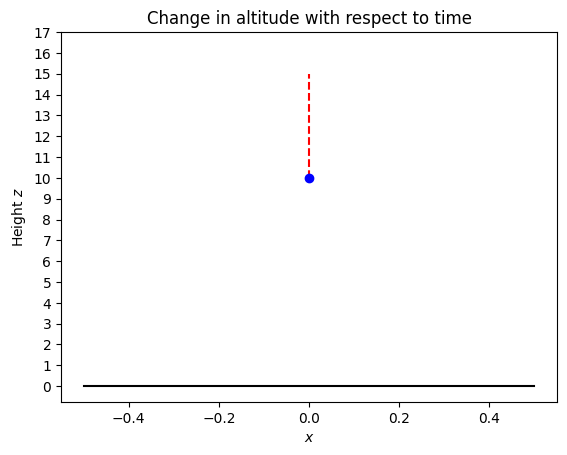

In [99]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from IPython.display import HTML



fig, ax = plt.subplots()

def animate(t):
    ax.clear()

    # Path
    ax.plot(x_log[:,0], x_log[:,2], 'r--')

    # Initial conditions
    ax.plot(x_log[t,0], x_log[t,2], 'bo')

    # Plot floor
    ax.plot([-0.5,0.5], [0,0], 'k-')

    ax.set_yticks(np.arange(0, 18, 1))

    # Add the max height of the records
    if t > 0:
      max_z = np.max(x_log[:t, 2])
      max_index = np.argmax(x_log[:t,2])

      ax.text(x_log[max_index, 0], max_z, f'{max_z:.2f}', color='green')
    ax.set(title="Change in altitude with respect to time", xlabel="$x$", ylabel="Height $z$")

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())